In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score
from sklearn import metrics  
from scikeras.wrappers import KerasClassifier   #to use sckitlearn GridSearchCV on keras model
from tensorflow.keras.models import Sequential    #to create an ANN-Artificial neural network
from tensorflow.keras.layers import Dense, Activation  
from tensorflow.keras.callbacks import EarlyStopping # We use EarlyStopping as callback 
from tensorflow.keras.utils import plot_model
import time
start = time.time()

In [2]:
df=pd.read_csv("cardio_train.csv",sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.drop("id",inplace=True,axis=1)

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Age in days
#Gender-(2-Male,1-Female)
#height in centimetre
#weight in kg
#Systolic blood pressure
#Distolic blood pressure
#glucose 1: normal, 2: above normal, 3: well above normal
#smoke - (1-smoker,0-not a smoker)
#active-0 or 1
#alcohol intake-0 or 1
#cardiovascular disease- (1-high possible chances,0- very less) target variable
#cholestrol-(1: normal, 2: above normal, 3: well above normal)

In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


<Axes: >

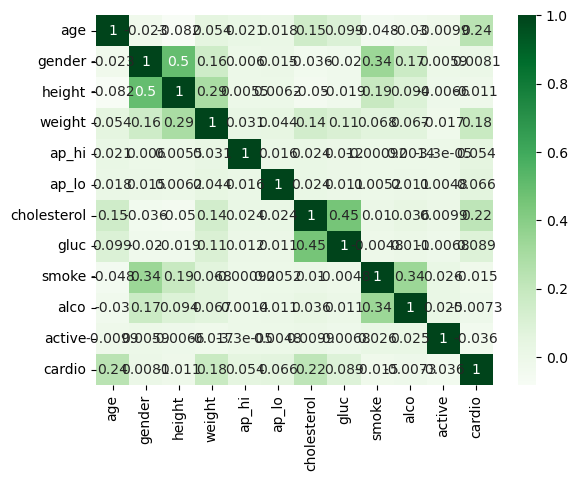

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [11]:
df.cardio.value_counts()
#Balanced Dataset

cardio
0    35021
1    34979
Name: count, dtype: int64

In [12]:
Y=df["cardio"]

In [13]:
X=df.drop("cardio",axis=1)


In [14]:
#Feature Selection
from sklearn.ensemble import ExtraTreesRegressor

In [15]:
model=ExtraTreesRegressor()

In [16]:
feat_imp=model.fit(X,Y)

In [17]:
feat_imp.feature_importances_

array([0.26546146, 0.01878856, 0.17442794, 0.1683132 , 0.16499352,
       0.10491022, 0.04802948, 0.02208622, 0.0121084 , 0.01040792,
       0.01047307])

In [18]:
feat_imp=pd.Series(feat_imp.feature_importances_,index=X.columns)

<Axes: >

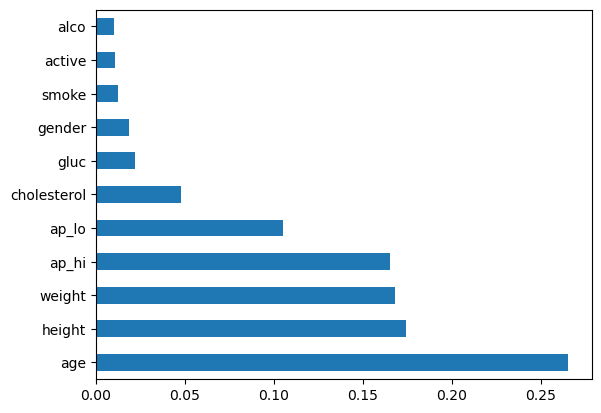

In [19]:
feat_imp.nlargest(13).plot(kind="barh")

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
seed=10

In [21]:
print("Starting Random forest")
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(X_train, Y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_random = classifier.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(Y_test,y_pred_random)))
#Accuracy is 0.710

Starting Random forest
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Test time: 0.5696272850036621
The accuracy is 0.7166285714285714


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [22]:
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(Y_test,y_pred_nb)))
#The accuracy is 0.588

Starting Naive Bayes
Training time: 28.055095672607422
Test time: 0.007639408111572266
Accuracy is 0.6000571428571428


In [23]:
#Decision tree
print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_dt = clf.predict(X_test)
y_pred_dt_roc = clf.predict_proba(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(y_pred_dt,Y_test)))
#Accuracy is 0.6326285714285714

Starting Decision tree
Training time: 28.498212337493896
Test time: 0.015570640563964844
The accuracy is 0.6362857142857142


In [24]:
print("Starting Multi layer perceptron")
model = MLPClassifier( max_iter=130, batch_size=1000, alpha=1e-4, activation = 'relu',solver='adam', verbose=10, tol=1e-4, random_state=seed)
model.fit(X_train, Y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_mlp = model.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(y_pred_mlp,Y_test)))
#Accuracy is 0.4976

Starting Multi layer perceptron
Iteration 1, loss = 16.89620738
Iteration 2, loss = 14.96544301
Iteration 3, loss = 11.37619058
Iteration 4, loss = 5.80877456
Iteration 5, loss = 4.87905670
Iteration 6, loss = 5.99578994
Iteration 7, loss = 11.32765531
Iteration 8, loss = 10.98065443
Iteration 9, loss = 5.31621169
Iteration 10, loss = 10.55991564
Iteration 11, loss = 7.12705096
Iteration 12, loss = 9.57973927
Iteration 13, loss = 10.52750511
Iteration 14, loss = 11.26972926
Iteration 15, loss = 6.82880439
Iteration 16, loss = 12.76899210
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training time: 30.432358980178833
Test time: 0.012926816940307617
Accuracy is 0.5008


In [25]:
print("Starting Gradient boost")
model = GradientBoostingClassifier(n_estimators=20, random_state=seed,verbose=2)
model.fit(X_train, Y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_gradient = model.predict(X_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is"+str(accuracy_score(y_pred_gradient,Y_test)))
#Accuracy is 0.729

Starting Gradient boost
      Iter       Train Loss   Remaining Time 
         1           1.3385            1.40s
         2           1.2995            1.19s
         3           1.2675            1.07s
         4           1.2409            0.99s
         5           1.2187            0.90s
         6           1.2002            0.86s
         7           1.1848            0.80s
         8           1.1719            0.76s
         9           1.1608            0.69s
        10           1.1511            0.62s
        11           1.1431            0.56s
        12           1.1364            0.49s
        13           1.1305            0.43s
        14           1.1255            0.37s
        15           1.1210            0.31s
        16           1.1170            0.25s
        17           1.1136            0.18s
        18           1.1106            0.12s
        19           1.1081            0.06s
        20           1.1056            0.00s
Training time: 31.689630031585

In [26]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000) 
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nn = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn,axis=1)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

print(model.summary())
print(model.evaluate(X_test,Y_test)[1])
#accuracy is #0.626



Epoch 1/200


53/53 - 2s - loss: 5.3828 - accuracy: 0.4930 - val_loss: 1.0048 - val_accuracy: 0.4993 - 2s/epoch - 36ms/step
Epoch 2/200
53/53 - 0s - loss: 0.7451 - accuracy: 0.5125 - val_loss: 0.6854 - val_accuracy: 0.5010 - 226ms/epoch - 4ms/step
Epoch 3/200
53/53 - 0s - loss: 0.6933 - accuracy: 0.5246 - val_loss: 0.7031 - val_accuracy: 0.5095 - 194ms/epoch - 4ms/step
Epoch 4/200
53/53 - 0s - loss: 0.6947 - accuracy: 0.5243 - val_loss: 0.6730 - val_accuracy: 0.6769 - 216ms/epoch - 4ms/step
Epoch 5/200
53/53 - 0s - loss: 0.6990 - accuracy: 0.5330 - val_loss: 0.6710 - val_accuracy: 0.5622 - 216ms/epoch - 4ms/step
Epoch 6/200
53/53 - 0s - loss: 0.7023 - accuracy: 0.5277 - val_loss: 0.7266 - val_accuracy: 0.5009 - 251ms/epoch - 5ms/step
Epoch 7/200
53/53 - 0s - loss: 0.6895 - accuracy: 0.5414 - val_loss: 0.6822 - val_accuracy: 0.5122 - 214ms/epoch - 4ms/step
Epoch 8/200
53/53 - 0s - loss: 0.6935 - accuracy: 0.5551 - val_loss: 0.6633 - val_accuracy: 0.5965 - 216ms/epoch - 4ms/step
Epoch 

In [27]:
diff1=pd.read_csv("CVD_cleaned.csv",sep=",")

In [28]:
diff1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [29]:
diff1["Exercise"]=diff1["Exercise"].apply(lambda x: 1 if x=="Yes" else 0)

In [30]:
diff1["Heart_Disease"]=diff1["Heart_Disease"].apply(lambda x: 1 if x=="Yes" else 0)

In [31]:
diff1["Skin_Cancer"]=diff1["Skin_Cancer"].apply(lambda x: 1 if x=="Yes" else 0)

In [32]:
diff1["Other_Cancer"]=diff1["Other_Cancer"].apply(lambda x: 1 if x=="Yes" else 0)

In [33]:
diff1["Depression"]=diff1["Depression"].apply(lambda x: 1 if x=="Yes" else 0)

In [34]:
diff1["Diabetes"]=diff1["Diabetes"].apply(lambda x: 1 if x=="Yes" else 0)

In [35]:
diff1["Arthritis"]=diff1["Arthritis"].apply(lambda x: 1 if x=="Yes" else 0)

In [36]:
diff1["Sex"]=diff1["Sex"].apply(lambda x: 1 if x=="Male" else 0)

In [37]:
diff1["Smoking_History"]=diff1["Smoking_History"].apply(lambda x: 1 if x=="Yes" else 0)

In [38]:
diff1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [39]:
diff1["General_Health"].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [40]:
diff1["General_Health"]=diff1["General_Health"].replace("Poor",0)
diff1["General_Health"]=diff1["General_Health"].replace("Fair",1)
diff1["General_Health"]=diff1["General_Health"].replace("Good",2)
diff1["General_Health"]=diff1["General_Health"].replace("Very Good",3)
diff1["General_Health"]=diff1["General_Health"].replace("Excellent",4)

In [41]:
diff1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,Within the past 2 years,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,Within the past year,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,Within the past year,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,Within the past year,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,Within the past year,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [42]:
diff1.Checkup.unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [43]:
diff1["Checkup"]=diff1["Checkup"].replace("Never",0)
diff1["Checkup"]=diff1["Checkup"].replace("Within the past year",1)
diff1["Checkup"]=diff1["Checkup"].replace("Within the past 2 years",2)
diff1["Checkup"]=diff1["Checkup"].replace("Within the past 5 years",3)
diff1["Checkup"]=diff1["Checkup"].replace("5 or more years ago",4)

In [44]:
diff1.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,2,0,0,0,0,0,0,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,1,0,0,0,0,0,0,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [45]:
diff1.Age_Category.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [46]:
category_map = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
                '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
                '70-74': 10, '75-79': 11, '80+': 12}
diff1['Age_Category'] = diff1['Age_Category'].replace(category_map)


In [47]:
diff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  int64  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [48]:
diff1.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,2.530448,1.359241,0.775062,0.080850,0.097114,0.096738,0.200422,0.130065,0.327245,0.481321,6.535888,170.615249,83.588655,28.626211,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.031224,0.782925,0.417542,0.272606,0.296113,0.295602,0.400316,0.336375,0.469208,0.499652,3.523526,10.658026,21.343210,6.522323,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163.000000,68.040000,24.210000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,170.000000,81.650000,27.440000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,178.000000,95.250000,31.850000,1.000000,6.000000,30.000000,20.000000,8.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,241.000000,293.020000,99.330000,1.000000,30.000000,120.000000,128.000000,128.000000


<Axes: >

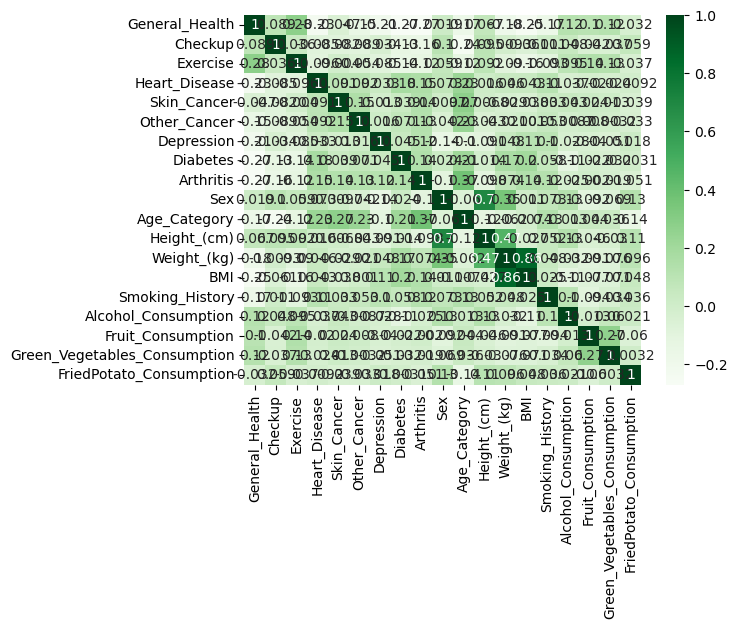

In [49]:
sns.heatmap(diff1.corr(),annot=True,cmap="Greens")

In [50]:
diff1.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [51]:
X1=diff1.drop("General_Health",axis=1)
Y1=diff1["General_Health"]

In [52]:
X1.head()

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,1,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,1,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [53]:
Y1.head()

0    0
1    3
2    3
3    0
4    2
Name: General_Health, dtype: int64

In [54]:
model1=ExtraTreesRegressor()

In [55]:
feat_imp1=model1.fit(X1,Y1)

In [56]:
feat_imp1=pd.Series(feat_imp1.feature_importances_,index=X1.columns)

<Axes: >

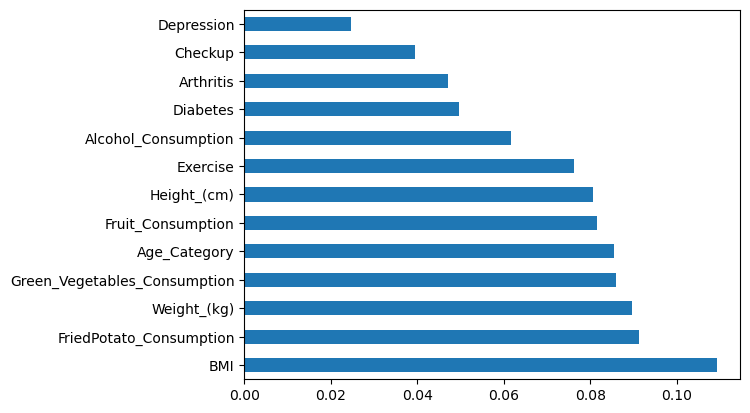

In [57]:
feat_imp1.nlargest(13).plot(kind="barh")

In [58]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25)

In [59]:
print("Starting Random forest")
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(X1_train, Y1_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_random = classifier.predict(X1_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(Y1_test,y_pred_random)))
#Accuracy is 0.40654544512653146

Starting Random forest
building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Training time: 285.1934587955475
Test time: 6.053219318389893
The accuracy is 0.40503017587484136


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.9s finished


In [60]:
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(X1_train, Y1_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(X1_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(Y1_test,y_pred_nb)))
#The accuracy is 0.34694485456005386

Starting Naive Bayes
Training time: 291.3951506614685
Test time: 0.0838160514831543
Accuracy is 0.34896521356230736


In [61]:
#Decision tree
print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(X1_train,Y1_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_dt = clf.predict(X1_test)
y_pred_dt_roc = clf.predict_proba(X1_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("The accuracy is "+str(accuracy_score(y_pred_dt,Y1_test)))
#Accuracy is 0.3275442277307224

Starting Decision tree
Training time: 295.2203755378723
Test time: 0.1234896183013916
The accuracy is 0.32767373792317456


In [62]:
print("Starting Multi layer perceptron")
model = MLPClassifier( max_iter=130, batch_size=1000, alpha=1e-4, activation = 'relu',solver='adam', verbose=10, tol=1e-4, random_state=seed)
model.fit(X1_train, Y1_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_mlp = model.predict(X1_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))
print("Accuracy is "+str(accuracy_score(y_pred_mlp,Y1_test)))
#Accuracy is 0.4294298961328257

Starting Multi layer perceptron
Iteration 1, loss = 1.80733519
Iteration 2, loss = 1.29875180
Iteration 3, loss = 1.27600732
Iteration 4, loss = 1.27128803
Iteration 5, loss = 1.27389940
Iteration 6, loss = 1.27031114
Iteration 7, loss = 1.26642529
Iteration 8, loss = 1.26739249
Iteration 9, loss = 1.26309977
Iteration 10, loss = 1.26363339
Iteration 11, loss = 1.26302689
Iteration 12, loss = 1.26895428
Iteration 13, loss = 1.26314388
Iteration 14, loss = 1.26298203
Iteration 15, loss = 1.26084720
Iteration 16, loss = 1.26337697
Iteration 17, loss = 1.26031280
Iteration 18, loss = 1.26357060
Iteration 19, loss = 1.25835409
Iteration 20, loss = 1.25846248
Iteration 21, loss = 1.25902410
Iteration 22, loss = 1.26040495
Iteration 23, loss = 1.26182207
Iteration 24, loss = 1.26159555
Iteration 25, loss = 1.25851479
Iteration 26, loss = 1.25873416
Iteration 27, loss = 1.25696544
Iteration 28, loss = 1.25700425
Iteration 29, loss = 1.26082797
Iteration 30, loss = 1.25659106
Iteration 31, los